In [165]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
import networkx
import tweepy as tw
from textblob import TextBlob
import warnings
import datetime
warnings.filterwarnings("ignore")

In [166]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

from googletrans import Translator
translator = Translator()
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text
    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1
 
import tweepy 
consumer_key='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret='xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [187]:
tweets = api.user_timeline('@pepsi', count=500, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw
user_id = 'pepsi' 
count=500
tw_pep = list_tweets(user_id, count)


@LoudAxel 😍😍😍

@brand__stan ily

@CultofIceCream yes

@TheAgingSea ayeeee🍒

@ADriftingNerd 🤘🤘🤘

┳┻|
┻┳|
┳┻|
┻┳|
┳┻|
┻┳|
┳┻| _
┻┳| •.•)  Did someone say
┳┻|⊂ﾉ    Pepsi?
┻┳|

@joebarreca7 sounds like fate

@DisneyMom917 you bet it is!

This is your reminder...treat yourself to a Pepsi Wild Cherry today. https://t.co/fEAIkdzYy5

@LizzieLDesigns @CherriesWild @FOXTV For additional questions or comments please call 800-332-1741 or email:  pepsiwildcherrypromo@prizelogic.zendesk.com.

@KelseyDelave true

@elizabethlamphe too cute!

Yeah, professional hockey is cool, but have you ever watched adorable vids of peewee hockey?

@canomarcia Hey! Thanks for being an awesome fan. Send us a DM -- we want to send you something special.

@micortazonzz1 Hey! Thanks for being an awesome fan. Send us a DM -- we want to send you something special.

@dangervilms Hey! Thanks for being an awesome fan. Send us a DM -- we want to send you something special

@obvmichelle Hey! Thanks for being an awesome fan. Se

In [188]:
tw_pep[2]

'@CultofIceCream yes'

In [189]:
import re as re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
import numpy as np
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z]", " ")
    return lst

tw_pep=clean_tweets(tw_pep)
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
            sents = []
            for tw in lst:
                try:
                    st = sentiment_analyzer_scores(tw, engl)
                    sents.append(st)
                except:
                    sents.append(0)
            ax = sns.distplot(
                sents,
                kde=False,
                bins=3)
            ax.set(xlabel='Negative                Neutral                 Positive',
                   ylabel='#Tweets',
                  title="Tweets of @"+title)
            return sents

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JohnVinodhA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


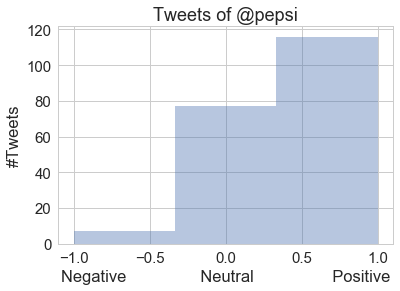

In [190]:
import seaborn as sns
tw_pep_sent=anl_tweets(tw_pep,user_id)

import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

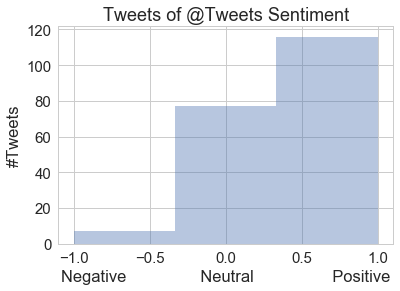

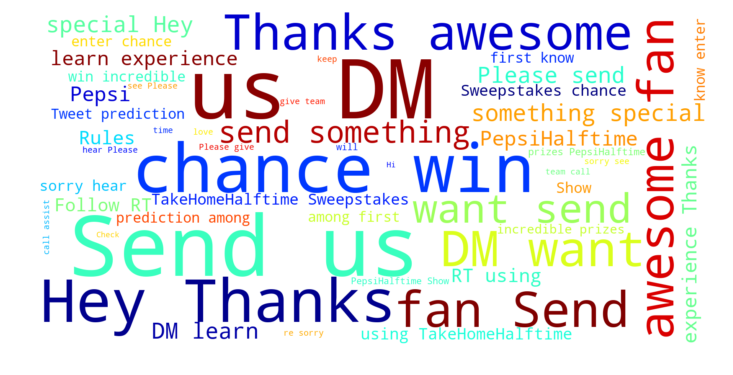

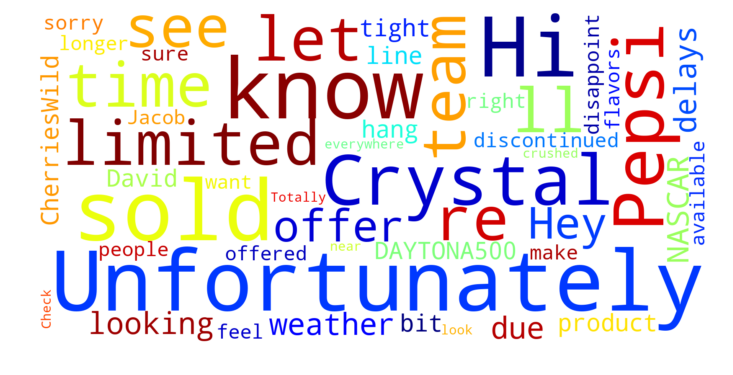

In [191]:
tws_sent=anl_tweets(tw_pep)

tw_pep=pd.DataFrame(tw_pep)
tws_sent=pd.DataFrame(tw_pep_sent)
tw_pep['text']=tw_pep[0]
tw_pep['tws_sent']=tws_sent
tws_pos=tw_pep['text'][tw_pep['tws_sent']==1]
word_cloud(tws_pos)
tws_neg=tw_pep['text'][tw_pep['tws_sent']==-1]
word_cloud(tws_neg)

In [192]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweets
HT_positive = hashtag_extract(tw_pep['text'][tw_pep['tws_sent'] == 1])
# extracting hashtags from negative tweets
HT_negative = hashtag_extract(tw_pep['text'][tw_pep['tws_sent'] == -1])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])


In [193]:
HT_negative

['DAYTONA500', 'CherriesWild']

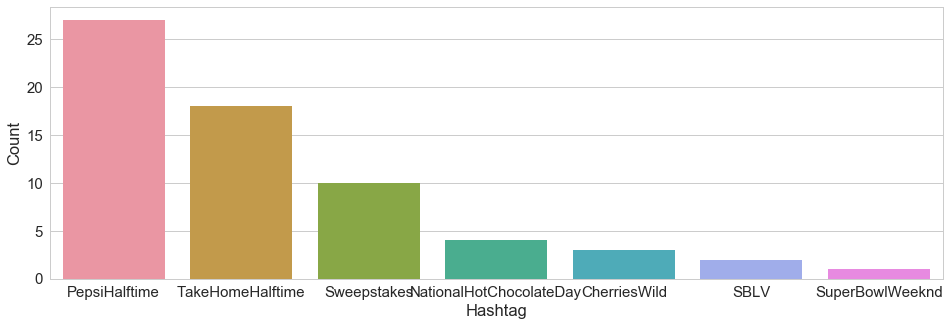

In [194]:
a=nltk.FreqDist(HT_positive)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()



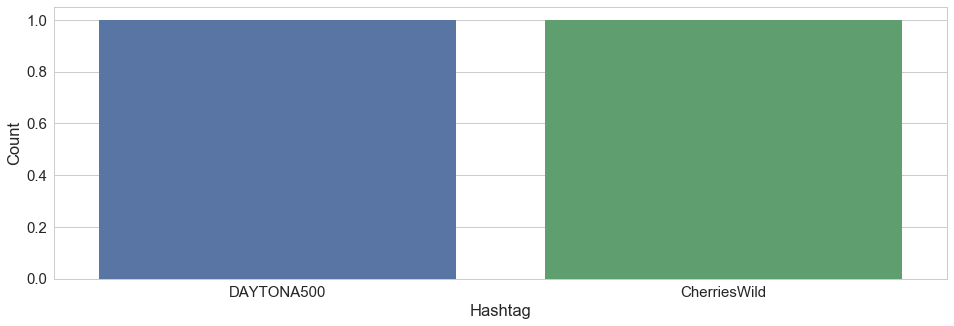

In [195]:
b=nltk.FreqDist(HT_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e=e.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()